## Exercice 1 A)

### a)

In [466]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [467]:
def add_biais(x):
    return np.concatenate([np.ones((len(x), 1)), x], axis=1)

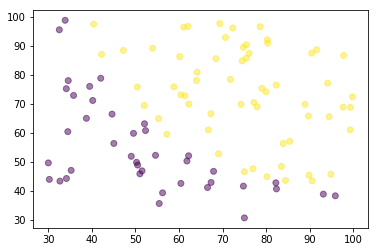

In [502]:
train = None
test = None

# select the location of the train file and the test file in your system
train_file = 'student-dataset-train.csv'
test_file = 'student-dataset-test.csv'

with open(train_file, newline='') as csvfile:     
    train = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))

with open(test_file, newline='') as csvfile:     
    test = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))
    
    
X_train = add_biais(train[:,:2].astype(np.float))
Y_train = train[:,2].astype(np.integer)

X_test = add_biais(test[:,:2].astype(np.float))
Y_test = test[:,2].astype(np.integer)

plt.scatter(X_train[:,1], X_train[:,2], c=Y_train, alpha=0.5)
plt.show()

In [469]:
print(X_train.shape)
print(Y_train.shape)

(100, 3)
(100,)


## b) Z normalization

In [503]:
mean_1 = np.mean(X_train[:,1])
mean_2 = np.mean(X_train[:,2])

# standard deviation (equart type)
std_1 = np.std(X_train[:,1])
std_2 = np.std(X_train[:,2])

In [504]:
def z_norm(x,mean,std):
    return (x-mean)/std

X_train[:,1] = z_norm(X_train[:,1],mean_1,std_1)
X_train[:,2] = z_norm(X_train[:,2],mean_2,std_2)

### c) sigmoid function

In [505]:
def sig(x):
    return 1/(1 + np.exp(-x))

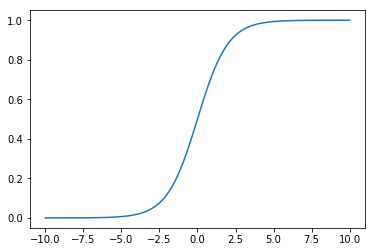

In [506]:
xs = np.linspace(-10,10, 100)
plt.plot(xs,sig(xs))
plt.show()

### d) h(x)


In [507]:
def h_theta(theta, x):
     return sig(np.dot(theta,x.T))
    

In [508]:
print(h_theta(np.array([1,0,0]),X_train))

[0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858
 0.73105858 0.73105858 0.73105858 0.73105858 0.73105858 0.7310

### e) cost function

In [509]:
def cost_function(theta,x,y):
    part_a = y * np.log(h_theta(theta,x))
    part_b = np.subtract(np.ones(y.shape[0]),y) * np.log(1 - h_theta(theta,x))
    return  np.sum(part_a + part_b)/x.shape[0]

### f) gradient ascent

In [510]:
def gradient_asc(x,y,lr,epoch):
    thetas = np.zeros(x.shape[1])
    N = x.shape[0]
    
    costs = []
    
    for n in range(epoch):
        
        new_thetas = np.zeros(x.shape[1])
        
        for i in range(x.shape[1]):
            #new_thetas[i] += lr * 1./N * np.sum((y-h_theta(thetas,x))*x[:,i])
            new_thetas[i] = thetas[i] + lr * 1./N * np.sum((y-h_theta(thetas,x))*x[:,i])
        
        thetas = new_thetas.copy()
        
        costs.append(cost_function(thetas,x,y))
    
    return thetas, costs

[1.27065455 3.0472347  2.8115401 ]


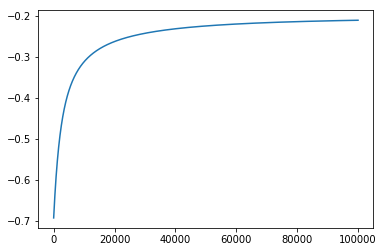

In [511]:
t,c = gradient_asc(X_train,Y_train,0.001,100000)
print(t)
plt.plot(range(len(c)),c)
plt.show()

In [512]:
X_test[:,1] = z_norm(X_test[:,1],mean_1,std_1)
X_test[:,2] = z_norm(X_test[:,2],mean_2,std_2)

In [513]:
h_Xtrain = h_theta(t,X_train)
preds = [1 if h_Xtrain[i]>= 0.5 else 0 for i in range(len(h_Xtrain))]
print("train correct rate = {}/{}".format(np.sum(Y_train==preds),len(Y_train)))


h_Xtest = h_theta(t,X_test)
preds = [1 if h_Xtest[i]>= 0.5 else 0 for i in range(len(h_Xtest))]
print("test correct rate = {}/{}".format(np.sum(Y_test==preds),len(Y_test)))

train correct rate = 89/100
test correct rate = 89/100


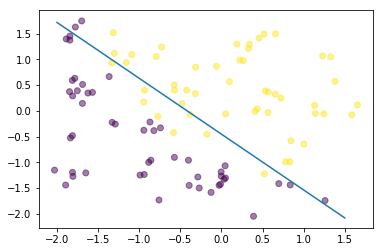

In [514]:
plt.scatter(X_test[:,1], X_test[:,2], c=Y_test, alpha=0.5)


xs = np.linspace(-2,1.5,10)
# see https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
ys = [-(t[0] + t[1]*xs[i])/t[2] for i in range(len(xs))]




plt.plot(xs,ys)
plt.show()

## Exercice 1 C)

In [559]:
train = None
test = None

# select the location of the train file and the test file in your system
train_file = 'student-dataset-train.csv'
test_file = 'student-dataset-test.csv'

with open(train_file, newline='') as csvfile:     
    train = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))

with open(test_file, newline='') as csvfile:     
    test = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))
    
    
X_train = add_biais(train[:,:2].astype(np.float))
Y_train = train[:,2].astype(np.integer)

X_test = add_biais(test[:,:2].astype(np.float))
Y_test = test[:,2].astype(np.integer)

In [560]:
def get_complex_set(x):    
    endarray = np.column_stack([np.power(x[:,1],2),np.power(x[:,2],2),np.multiply(x[:,1],x[:,2])])
    return np.concatenate([x,endarray],axis=1)
X_trcp = get_complex_set(X_train)

In [561]:
means = []
stds = []

for i in range(X_trcp.shape[1]):
    means.append(np.mean(X_trcp[:,i]))
    stds.append(np.std(X_trcp[:,i]))

stds

[0.0,
 19.360686712476134,
 18.48963567058878,
 2534.4954988002487,
 2489.736670159835,
 1767.48395004274]

In [562]:
def apply_norm(x,means,std):
    x_out = np.zeros(x.shape)
    for i in range(x.shape[1]):
        if stds[i] != 0:
            x_out[:,i] = z_norm(x[:,i],means[i],stds[i])
        else:
            x_out[:,i] = x[:,i]
    return x_out
        

In [563]:
X_trcp = apply_norm(X_trcp,means,stds)

In [568]:
t,c = gradient_asc(X_trcp,Y_train,0.1,50000)

c:\users\jonathanguerne\python_env\mpri_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jonathanguerne\python_env\mpri_env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


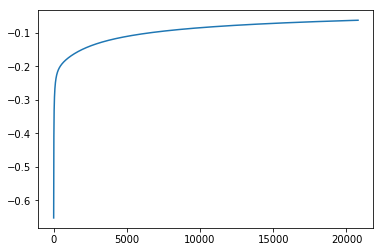

In [569]:
plt.plot(range(len(c)),c)
plt.show()

In [570]:
h_Xtrcp = h_theta(t,X_trcp)
preds = [1 if h_Xtrcp[i]>= 0.5 else 0 for i in range(len(h_Xtrcp))]
print("train correct rate = {}/{}".format(np.sum(Y_train==preds),len(Y_train)))

train correct rate = 100/100


In [571]:
X_tecp = get_complex_set(X_test)

In [572]:
X_tecp = apply_norm(X_tecp, means, stds)

In [573]:
h_Xtecp = h_theta(t,X_tecp)
preds = [1 if h_Xtecp[i]>= 0.5 else 0 for i in range(len(h_Xtecp))]
print("test correct rate = {}/{}".format(np.sum(Y_test==preds),len(Y_test)))

test correct rate = 95/100


In [555]:
X_test[:,1] = z_norm(X_test[:,1],means[1],stds[2])
X_test[:,2] = z_norm(X_test[:,2],means[3],stds[3])

-0.8925029271419611
-2.3605826058778963
-3.8286622846138307
-5.296741963349766
-6.7648216420857015
-8.232901320821638
-9.70098099955757
-11.169060678293507
-12.637140357029443
-14.105220035765376
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


c:\users\jonathanguerne\python_env\mpri_env\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


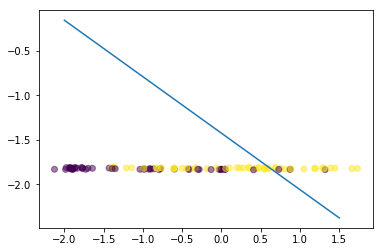

In [558]:


plt.scatter(X_test[:,1], X_test[:,2], c=Y_test, alpha=0.5)


xs = np.linspace(-2,1.5,10)
# see https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38
def part1(x1):
    return -(t[2]+t[5]*x1)/2*t[4]

def part2(x1):
    a = -4*t[0]*t[4] - 4*t[1]*t[4]*x1 + t[2]**2 
    + 2*t[2]*t[5]*x1 - 4*t[3]*t[4]*x1**2
    + t[5]**2*x1**2
    
    print(a)
    
    return np.sqrt(a)/2*t[4]


print([part2(i) for i in range(len(xs))])

ys = [part1(i) for i in range(len(xs))]




plt.plot(xs,ys)
plt.show()

## Exercice 1 D)

In [547]:
train = None
test = None

# select the location of the train file and the test file in your system
train_file = 'student-dataset-train.csv'
test_file = 'student-dataset-test.csv'

with open(train_file, newline='') as csvfile:     
    train = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))

with open(test_file, newline='') as csvfile:     
    test = np.array(list(csv.reader(csvfile, delimiter=',', quotechar='|')))
    
    
X_train = add_biais(train[:,:2].astype(np.float))
Y_train = train[:,2].astype(np.integer)

X_test = add_biais(test[:,:2].astype(np.float))
Y_test = test[:,2].astype(np.integer)

In [548]:
from sklearn import linear_model



clf = linear_model.SGDClassifier(loss='log',eta0=0.01, max_iter = 100000)
clf.fit(X_train,Y_train)

preds = clf.predict(X_test)
print("test correct rate = {}/{}".format(np.sum(Y_test==preds),len(Y_test)))

test correct rate = 89/100
